In [1]:
# Operating System
import os

import pandas as pd
import numpy as np

import random

import matplotlib.pyplot as plt
%matplotlib inline

# Load original data

In [2]:
#file_path = ".\data\train.csv"
file_path = os.path.join('data', 'train.csv')


# Option 1 for reading a sample of the file
n_total_rows = 2437645
prc_rows_to_read = 10
n_rows_to_read = int(prc_rows_to_read/100*n_total_rows)
n_rows_to_skip = n_total_rows - n_rows_to_read

random.seed(178) # this is to get always the same sample. can be removed if we want the sample to change
list_of_rows_to_skip = random.sample(
    range(1, n_total_rows-1), # this is a range from the first row after the header, to the last row on the file
    n_rows_to_skip # this is the number of rows we want to sample, i.e, to skip
)


# Option 2 for reading a sample of the file
# sample 10% of the rows
p = 0.01

try:
    df_original = pd.read_csv(file_path, 
                             skiprows = lambda row_num: random.random() > p and row_num > 0, 
                             #nrows = 10000, 
                             header=0,
                             warn_bad_lines=True)
except:
    print('Ooops!!! We got an error!')


In [3]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24827 entries, 0 to 24826
Data columns (total 15 columns):
VehicleSearchedIndicator            24827 non-null bool
ContrabandIndicator                 24827 non-null bool
Department Name                     24827 non-null object
InterventionDateTime                24827 non-null object
InterventionLocationName            24827 non-null object
InterventionReasonCode              24827 non-null object
ReportingOfficerIdentificationID    24827 non-null object
ResidentIndicator                   24827 non-null bool
SearchAuthorizationCode             24826 non-null object
StatuteReason                       24820 non-null object
SubjectAge                          24827 non-null float64
SubjectEthnicityCode                24827 non-null object
SubjectRaceCode                     24827 non-null object
SubjectSexCode                      24827 non-null object
TownResidentIndicator               24827 non-null bool
dtypes: bool(4), float64(1),

# Transform data to analysis

In [4]:
remane_columns_dict = {'VehicleSearchedIndicator': 'search', 
                       'ContrabandIndicator': 'target', 
                       'Department Name': 'departm',
                       'InterventionDateTime': 'date',
                       'InterventionLocationName': 'local',
                       'InterventionReasonCode': 'reason',
                       'ReportingOfficerIdentificationID': 'officerID',
                       'ResidentIndicator': 'state_res',
                       'SearchAuthorizationCode': 'search_reason',
                       'StatuteReason': 'stop_reason',
                       'SubjectAge': 'age',
                       'SubjectEthnicityCode': 'ethnic',
                       'SubjectRaceCode': 'race',
                       'SubjectSexCode': 'sex',
                       'TownResidentIndicator': 'town_res'
                      }

In [5]:
def data_transformer(df_original: pd.DataFrame, columns_dict: dict) -> pd.DataFrame:
    """Transforms the original DataFrame to make it suited for data analysis.
    
    Args:
        df_original (pd.DataFrame):  Original DataFrame, as imported by pd.read_csv().
        columns_dict (dict): Correspondence between old a new column names.
        
    Returns:
        df (pd.DataFrame): Transformed DataFrame, ready for data analysis.
        
    TODO:
        * to do list
        
    """
    
    df = df_original.copy()
    
    # change column names
    df = df.rename(columns = columns_dict)
    
    # convert date to pd.datetime
    df.date = pd.to_datetime(df.date)
    
    # convert Intervention DateTime to index of the DataFrame
    #df = df.set_index('date').sort_index()
    
   
    return df

df = data_transformer(df_original, remane_columns_dict)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24827 entries, 0 to 24826
Data columns (total 15 columns):
search           24827 non-null bool
target           24827 non-null bool
departm          24827 non-null object
date             24827 non-null datetime64[ns]
local            24827 non-null object
reason           24827 non-null object
officerID        24827 non-null object
state_res        24827 non-null bool
search_reason    24826 non-null object
stop_reason      24820 non-null object
age              24827 non-null float64
ethnic           24827 non-null object
race             24827 non-null object
sex              24827 non-null object
town_res         24827 non-null bool
dtypes: bool(4), datetime64[ns](1), float64(1), object(9)
memory usage: 2.2+ MB


In [6]:
print("Number of car stops: {:,d}".format(df.shape[0]).replace(',', ' '))


Number of car stops: 24 827


In [7]:
print("Percentage of searches:")
df.search.value_counts(normalize=True, dropna=False)*100

Percentage of searches:


False    96.858259
True      3.141741
Name: search, dtype: float64

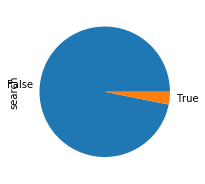

In [8]:
df.search.value_counts().plot.pie(figsize=(3,3));

In [9]:
print("Percentage of counterband discovers:")
df.target.value_counts(normalize=True, dropna=False)*100

Percentage of counterband discovers:


False    98.860112
True      1.139888
Name: target, dtype: float64

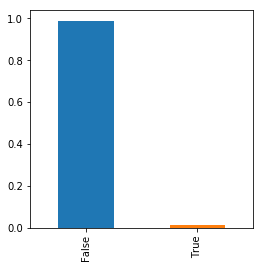

In [10]:
df.target.value_counts(normalize=True).plot.bar(figsize=(4,4));

In [11]:
print("Percentage of counterband discovers when car not searched:")
df[df.search==False].target.value_counts(normalize=True, dropna=False)*100

Percentage of counterband discovers when car not searched:


False    99.920988
True      0.079012
Name: target, dtype: float64

In [12]:
print("Percentage of counterband discovers when searched:")
df[df.search==True].target.value_counts(normalize=True, dropna=False)*100

Percentage of counterband discovers when searched:


False    66.153846
True     33.846154
Name: target, dtype: float64

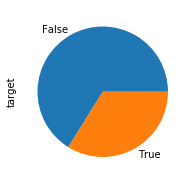

In [13]:
df[df.search==True].target.value_counts().plot.pie(figsize=(3,3));

In [14]:
df.departm.nunique()

118

In [15]:
pctl = (np.array([1,5] + list(range(10,90,10)) + [95,99])*0.01).round(decimals=2).tolist()
df.departm.value_counts().describe(percentiles=pctl)

count     118.000000
mean      210.398305
std       310.358550
min         1.000000
1%          1.000000
5%          9.800000
10%        22.400000
20%        55.000000
30%        87.200000
40%       125.600000
50%       155.000000
60%       177.000000
70%       241.500000
80%       320.600000
95%       515.150000
99%       673.980000
max      3147.000000
Name: departm, dtype: float64

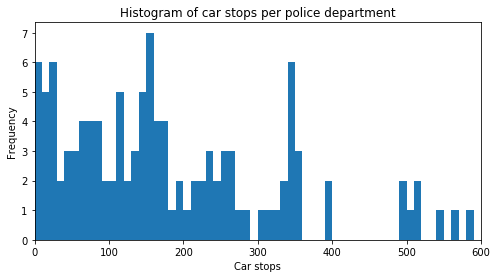

In [16]:
df.departm.value_counts().plot.hist(xlim= (0,600), bins=range(0,600,10), figsize=(8,4))
plt.title('Histogram of car stops per police department')
plt.xlabel('Car stops');

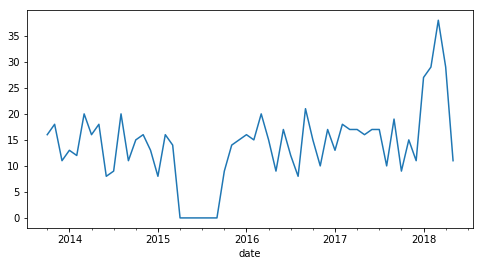

In [17]:
search_dt_series = df.set_index('date').sort_index().search.where(lambda x: x==True).dropna()
search_dt_series.resample('M').count().plot(figsize=(8, 4));
#search_dt_series.resample('M').count()
#search_dt_series[search_dt_series == True]
#df.date.dt.to_period('M')
#smonth.groupby(smonth).count()

In [18]:
df.local.nunique()

603

In [19]:
pctl = (np.array([1,5] + list(range(10,90,10)) + [95,99])*0.01).round(decimals=2).tolist()
df.local.value_counts().describe(percentiles=pctl)

count    603.000000
mean      41.172471
std       72.635417
min        1.000000
1%         1.000000
5%         1.000000
10%        1.000000
20%        1.000000
30%        3.000000
40%        6.000000
50%       13.000000
60%       21.000000
70%       36.000000
80%       59.600000
95%      179.000000
99%      342.900000
max      798.000000
Name: local, dtype: float64

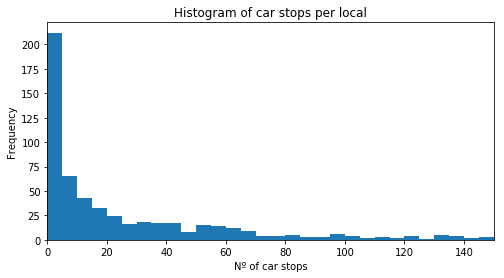

In [39]:
df.local.value_counts().plot.hist(xlim= (0,150), bins=range(0,200,5), figsize=(8,4))
plt.title('Histogram of car stops per local')
plt.xlabel('Nº of car stops');

In [21]:
df.reason.value_counts()

V    21920
E     2448
I      459
Name: reason, dtype: int64

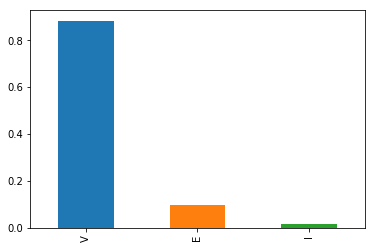

In [22]:
df.reason.value_counts(normalize=True).plot.bar();

In [23]:
df.state_res.value_counts(normalize=True, dropna=False)

True     0.860918
False    0.139082
Name: state_res, dtype: float64

In [24]:
df.search_reason.value_counts(normalize=True, dropna=False)

N      0.963709
O      0.018206
C      0.011842
I      0.006203
NaN    0.000040
Name: search_reason, dtype: float64

In [25]:
df.stop_reason.value_counts(normalize=True, dropna=False)

Speed Related             0.272405
Defective Lights          0.093205
Cell Phone                0.090788
Registration              0.090506
Moving Violation          0.077657
Traffic Control Signal    0.074234
Other                     0.070407
Stop Sign                 0.066822
STC Violation             0.052161
Seatbelt                  0.034076
Display of Plates         0.026946
Other/Error               0.017400
Window Tint               0.012043
Administrative Offense    0.010875
Suspended License         0.004914
Unlicensed Operation      0.003383
Equipment Violation       0.001813
NaN                       0.000282
Stop Sign                 0.000081
Name: stop_reason, dtype: float64

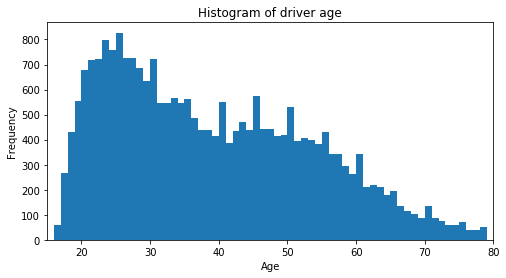

In [26]:
df.age.plot.hist(xlim= (15,80), bins=range(0,80,1), figsize=(8,4))
plt.title('Histogram of driver age')
plt.xlabel('Age');

In [38]:
df.age.value_counts().sort_index()

1.0       1
2.0       1
3.0       1
5.0       1
6.0       1
13.0      1
15.0      1
16.0     60
17.0    265
18.0    430
19.0    553
20.0    679
21.0    718
22.0    721
23.0    798
24.0    756
25.0    827
26.0    728
27.0    727
28.0    685
29.0    635
30.0    724
31.0    548
32.0    546
33.0    567
34.0    547
35.0    563
36.0    486
37.0    438
38.0    440
       ... 
69.0     86
70.0    136
71.0     89
72.0     76
73.0     60
74.0     59
75.0     70
76.0     39
77.0     41
78.0     34
79.0     18
80.0     34
81.0     20
82.0     22
83.0     16
84.0     16
85.0      9
86.0     11
87.0      9
88.0     13
89.0      8
90.0      5
91.0      5
92.0      4
93.0      1
94.0      1
95.0      2
97.0      4
98.0      1
99.0      8
Name: age, Length: 90, dtype: int64

In [27]:
df.ethnic.value_counts(normalize=True, dropna=False)

N    0.848713
H    0.132718
M    0.018568
Name: ethnic, dtype: float64

In [28]:
df.race.value_counts(normalize=True, dropna=False)

W    0.818786
B    0.153462
A    0.019012
I    0.008740
Name: race, dtype: float64

In [29]:
df.sex.value_counts(normalize=True, dropna=False)

M    0.634108
F    0.365892
Name: sex, dtype: float64

In [30]:
df.town_res.value_counts(normalize=True, dropna=False)

False    0.685061
True     0.314939
Name: town_res, dtype: float64